In [1]:
import pandas as pd
from sklearn.metrics import roc_auc_score
import numpy as np
import seaborn as sns
import matplotlib
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
import copy
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

## Data Exploration


In [2]:
data = pd.read_csv("SimpleDataSetWithNewTarget.csv")
data.head()

,artist_familiarity,artist_hotttnesss,artist_id,artist_latitude,artist_location,artist_longitude,artist_name,duration,end_of_fade_in,key,...,mode_confidence,release,song_hotttnesss,start_of_fade_out,tempo,time_signature,time_signature_confidence,title,year,bbhot
0,0.780462,0.574275,ARMQHX71187B9890D3,NaN,"Atlanta, GA",NaN,Mastodon,280.21506,0.238,5,...,0.500,Call of the Mastodon,0.597641,275.528,173.205,5,0.120,Deep Sea Creature,2001,0
1,0.581794,0.401998,ARD7TVE1187B99BFB1,NaN,California - LA,NaN,Casual,218.93179,0.247,1,...,0.636,Fear Itself,0.602120,218.932,92.198,4,0.778,I Didn't Mean To,0,0
2,0.630630,0.417500,ARMJAGH1187FB546F3,35.14968,"Memphis, TN",-90.04892,The Box Tops,148.03546,0.148,6,...,0.430,Dimensions,NaN,137.915,121.274,4,0.384,Soul Deep,1969,1
3,0.487357,0.343428,ARKRRTF1187B9984DA,NaN,NaN,NaN,Sonora Santanera,177.47546,0.282,8,...,0.565,Las Numero 1 De La Sonora Santanera,NaN,172.304,100.070,1,0.000,Amor De Cabaret,0,0
4,0.630382,0.454231,AR7G5I41187FB4CE6C,NaN,"London, England",NaN,Adam Ant,233.40363,0.000,0,...,0.749,Friend Or Foe,NaN,217.124,119.293,4,0.000,Something Girls,1982,0


In [3]:
#Encode artist id into quantitative
le = preprocessing.LabelEncoder()
data['artist_id'] = le.fit_transform(data['artist_id'].astype('str'))

In [9]:
#graph distribution of an attribute of songs that are hot
def freq(col):
   g = sns.kdeplot(data[col][(data["bbhot"] == 1)], color="Blue", shade = True)
   g.set_xlabel(col)
   g.set_ylabel("Frequency")
   g = g.legend(["1"])
   plt.show()

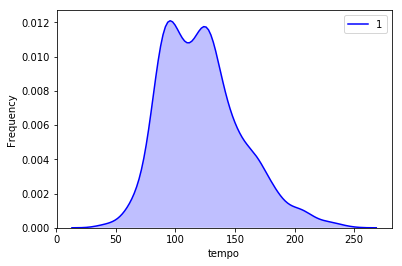

In [10]:
freq("tempo")

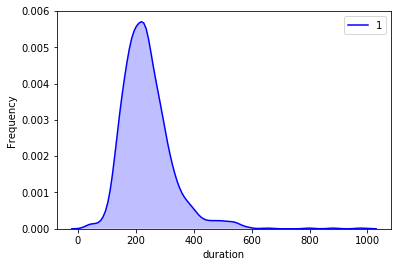

In [11]:
freq("duration")

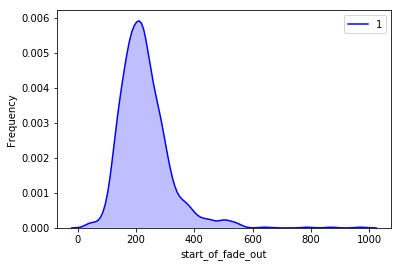

In [12]:
freq("start_of_fade_out")

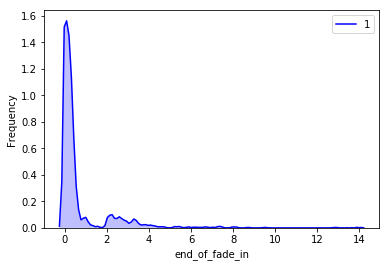

In [13]:
freq("end_of_fade_in")

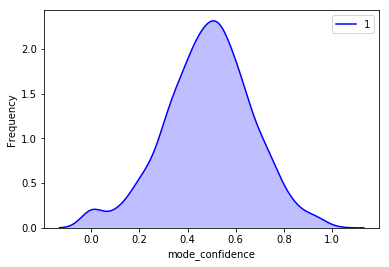

In [14]:
freq("mode_confidence")

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 23 columns):
artist_familiarity           9997 non-null float64
artist_hotttnesss            10001 non-null float64
artist_id                    10001 non-null int64
artist_latitude              3742 non-null float64
artist_location              5709 non-null object
artist_longitude             3742 non-null float64
artist_name                  10001 non-null object
duration                     10001 non-null float64
end_of_fade_in               10001 non-null float64
key                          10001 non-null int64
key_confidence               10001 non-null float64
loudness                     10001 non-null float64
mode                         10001 non-null int64
mode_confidence              10001 non-null float64
release                      10001 non-null object
song_hotttnesss              5649 non-null float64
start_of_fade_out            10001 non-null float64
tempo                

In [100]:
drop_list = ['artist_location', 'artist_latitude', 'artist_longitude','artist_name', 'release', 'title' ,'song_hotttnesss']
train = data.drop(drop_list, axis=1)

In [101]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 16 columns):
artist_familiarity           9997 non-null float64
artist_hotttnesss            10001 non-null float64
artist_id                    10001 non-null int64
duration                     10001 non-null float64
end_of_fade_in               10001 non-null float64
key                          10001 non-null int64
key_confidence               10001 non-null float64
loudness                     10001 non-null float64
mode                         10001 non-null int64
mode_confidence              10001 non-null float64
start_of_fade_out            10001 non-null float64
tempo                        10001 non-null float64
time_signature               10001 non-null int64
time_signature_confidence    10001 non-null float64
year                         10001 non-null int64
bbhot                        10001 non-null int64
dtypes: float64(10), int64(6)
memory usage: 1.2 MB


In [102]:
Y = copy.deepcopy(train.bbhot)
Y.shape

(10001,)

In [103]:
train["artist_familiarity"] = train["artist_familiarity"].fillna(train["artist_familiarity"].median())

In [104]:
train1 = train.drop("bbhot", axis=1)

In [105]:
X_train, X_test, y_train, y_test = train_test_split(train1, Y, test_size=0.33, random_state=7)
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 87.85%


In [106]:
#Function to evaluate my model with Cross validation
from sklearn.model_selection import cross_val_score
def testingModel(model, X_train, Y_train):
    scores = cross_val_score(model, X_train, Y_train, cv=10, scoring = "roc_auc")
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard Deviation:", scores.std())

In [112]:
#61%
rf = RandomForestClassifier(n_estimators=100, oob_score = True)
rf.fit(train1, Y)
testingModel(rf, train1, Y)

Scores: [ 0.59461786  0.59160991  0.62197751  0.64039146  0.61771383  0.65179466
  0.6172226   0.6063774   0.63590839  0.58545168]
Mean: 0.616306529138
Standard Deviation: 0.0209514541388


In [113]:
#63%
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=100,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
xgb1.fit(train1, Y)
testingModel(xgb1, train1, Y)

Scores: [ 0.61899357  0.63935868  0.6591631   0.66604031  0.611862    0.67522582
  0.59946203  0.59170728  0.63769208  0.62461803]
Mean: 0.632412290476
Standard Deviation: 0.02676064386
